In [12]:
import pandas as pd
import numpy as np
import math
import datetime

In [17]:
df1

,방송일시,Unnamed: 1,Unnamed: 2,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01,06:00:00,AM,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01,06:00:00,AM,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01,06:20:00,AM,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01,06:20:00,AM,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01,06:40:00,AM,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31,11:40:00,PM,NaN,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01,12:00:00,AM,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01,12:00:00,AM,NaN,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01,12:00:00,AM,NaN,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [13]:
df1 = pd.read_excel("maindata/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터_v1_200818.xlsx", skiprows=[0])

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   방송일시        38309 non-null  object 
 1   Unnamed: 1  38309 non-null  object 
 2   Unnamed: 2  38309 non-null  object 
 3   노출(분)       21525 non-null  float64
 4   마더코드        38309 non-null  int64  
 5   상품코드        38309 non-null  int64  
 6   상품명         38309 non-null  object 
 7   상품군         38309 non-null  object 
 8   판매단가        38309 non-null  int64  
 9   취급액         35379 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.9+ MB


# 실적데이터 전처리

In [15]:
# 판매단가 NaN값(결측치) 행 삭제
## 행 삭제 전 개수 확인
print(len(df1))
print(sum(df1['판매단가'] == 0))

# 행 삭제
df1 = df1[df1['판매단가'] != 0]

# 결과 확인
len(df1)
#sum(df1["판매단가"].isna())

38309
937


37372

# 시간 데이터 나누기

In [16]:
df1['time'] = pd.to_datetime(df1["방송일시"], format = "%Y-%m-%d %H:%M:%S").dt.time
df1['방송일시'] = df1["방송일시"].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

# 노출(분) 결측치 채우기

In [ ]:
t = df1[df1['노출(분)']> 0]
t1 = t[['방송일시','time','노출(분)','마더코드']]
t1

In [ ]:
data = pd.merge(df1,t1,how= 'left',left_on = ('방송일시','time'), right_on = ('방송일시','time'))
data

In [ ]:
data.isnull().sum()

# hour 컬럼추가

In [ ]:
data['hour']  = pd.to_datetime(data['time'],format="%H:%M:%S").dt.hour
data

# 판매개수 컬럼 추가

In [ ]:
data['판매개수'] = np.ceil(data['취급액'] / data['판매단가'])
data

In [ ]:
data = data[['방송일시','time','hour','노출(분)_y','마더코드_x','상품코드','상품명','상품군','판매단가','취급액','판매개수']]
data

In [ ]:
data_group = data.groupby(['방송일시','hour','마더코드_x','상품코드','상품명','상품군','판매단가'])['노출(분)_y','취급액','판매개수'].sum()
data_group = data_group.reset_index()

# 방송시작시간 컬럼추가

In [ ]:
time = data.drop_duplicates(subset = ['방송일시','hour','마더코드_x','상품코드','상품명'], keep = 'first')
time

In [ ]:
data_group = pd.merge(data_group,time,how='inner',on=('방송일시','hour','마더코드_x','상품코드','상품명'))
data_group

In [ ]:
data_group.columns

In [ ]:
data_group = data_group[['방송일시','time','hour','노출(분)_y_x','마더코드_x','상품코드','상품명','상품군_x','판매단가_x','취급액_x','판매개수_x']]
data_group

In [53]:
data_group = data_group.rename(columns = {'노출(분)_y_x':'노출시간','마더코드_x':'마더코드','상품군_x':'상품군','판매단가_x':'판매단가','취급액_x':'취급액','판매개수_x':'판매개수'})
data_group

,방송일시,time,hour,노출시간,마더코드,상품코드,상품명,상품군,판매단가,취급액,판매개수
0,2019-01-01,06:00:00,6,60.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,12033000.0,303.0
1,2019-01-01,06:00:00,6,60.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,20663000.0,520.0
2,2019-01-01,07:00:00,7,60.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,47878000.0,812.0
3,2019-01-01,08:00:00,8,60.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,99736000.0,1666.0
4,2019-01-01,09:00:00,9,60.0,100816,202404,보코 리버시블 무스탕,의류,79000,90973000.0,1153.0
...,...,...,...,...,...,...,...,...,...,...,...
15253,2019-12-31,23:20:00,23,40.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,11821000.0,81.0
15254,2020-01-01,00:00:00,0,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,287.0
15255,2020-01-01,00:00:00,0,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,88.0
15256,2020-01-01,00:00:00,0,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,622.0


# 시청률 데이터 전처리

In [90]:
df2 = pd.read_excel('viewrating.xlsx', index_col = [0])
view = df2.T
view

시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,02:09,...,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59,월화수목금토일02:00-01:59
2019-01-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.014,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
2019-01-02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006
2019-01-03,0.000,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002
2019-01-04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
2019-01-05,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006
2019-12-29,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
2019-12-30,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.019,0.000,0.005
2019-12-31,0.000,0.012,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005


In [91]:
veiw_org_rate_d = view.iloc[:-1, -1:].reset_index() 
veiw_org_rate_d

시간대,index,월화수목금토일02:00-01:59
0,2019-01-01,0.004
1,2019-01-02,0.006
2,2019-01-03,0.002
3,2019-01-04,0.003
4,2019-01-05,0.002
...,...,...
360,2019-12-27,0.004
361,2019-12-28,0.006
362,2019-12-29,0.004
363,2019-12-30,0.005


In [92]:
# 기본 데이터 정제
view = view.iloc[:-1, :-1]
view = view.reset_index()

In [93]:
# view
view = pd.melt(view, id_vars=['index'], var_name='time', value_name='rate').copy()
view = view.rename(columns = {"index":"date"})
view["hour"] = [i[0:2] for i in view["time"]]

In [94]:
# org 컬럼 추가
view_time = view.groupby(["date", 'hour'])["rate"].max().reset_index()
view_date = view_time.groupby('date').mean().copy().reset_index()
view_time

,date,hour,rate
0,2019-01-01,00,0.012
1,2019-01-01,01,0.034
2,2019-01-01,02,0.014
3,2019-01-01,03,0.014
4,2019-01-01,04,0.014
...,...,...,...
8755,2019-12-31,19,0.033
8756,2019-12-31,20,0.018
8757,2019-12-31,21,0.028
8758,2019-12-31,22,0.108


In [82]:
view_org_t = view.groupby(["date", 'hour'])["rate"].max().reset_index()
view_org_d = view_time.groupby('date').mean().copy().reset_index()
view_time

,date,hour,rate
0,2019-01-01,00,0.012
1,2019-01-01,01,0.034
2,2019-01-01,02,0.014
3,2019-01-01,03,0.014
4,2019-01-01,04,0.014
...,...,...,...
8755,2019-12-31,19,0.033
8756,2019-12-31,20,0.018
8757,2019-12-31,21,0.028
8758,2019-12-31,22,0.108


In [103]:
view_date['rate_org']  = veiw_org_rate_d.iloc[:,-1:]
view_date

,date,rate,rate_org
0,2019-01-01,0.024375,0.004
1,2019-01-02,0.031333,0.006
2,2019-01-03,0.026083,0.002
3,2019-01-04,0.023958,0.003
4,2019-01-05,0.020750,0.002
...,...,...,...
360,2019-12-27,0.027417,0.004
361,2019-12-28,0.036958,0.006
362,2019-12-29,0.037667,0.004
363,2019-12-30,0.029500,0.005


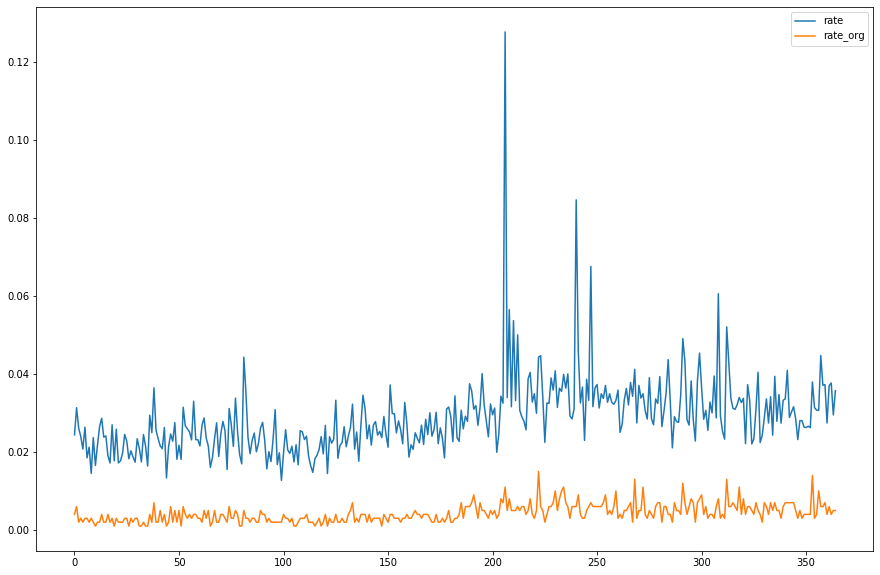

In [104]:
import matplotlib.pyplot as plt
#plt.figure()
view_date.plot(figsize=(15,10))

In [105]:
view_time["date"] = pd.to_datetime(view_time["date"], format = "%Y-%m-%d", errors='raise')
view_time


,date,hour,rate
0,2019-01-01,00,0.012
1,2019-01-01,01,0.034
2,2019-01-01,02,0.014
3,2019-01-01,03,0.014
4,2019-01-01,04,0.014
...,...,...,...
8755,2019-12-31,19,0.033
8756,2019-12-31,20,0.018
8757,2019-12-31,21,0.028
8758,2019-12-31,22,0.108


In [106]:
view_time["weekday"] = view_time["date"].dt.weekday
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
view_time["weekday"] = view_time["weekday"].apply(lambda x: weekday[x])

In [107]:
view_time

,date,hour,rate,weekday
0,2019-01-01,00,0.012,화
1,2019-01-01,01,0.034,화
2,2019-01-01,02,0.014,화
3,2019-01-01,03,0.014,화
4,2019-01-01,04,0.014,화
...,...,...,...,...
8755,2019-12-31,19,0.033,화
8756,2019-12-31,20,0.018,화
8757,2019-12-31,21,0.028,화
8758,2019-12-31,22,0.108,화


# 날씨데이터 전처리

In [108]:
weather = pd.read_csv('2019_weather.csv', encoding = "cp949")
weather

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),일 최심신적설(cm)
0,108,서울,2019-01-01,-8.2,-0.6,NaN,NaN
1,108,서울,2019-01-02,-8.8,0.2,NaN,NaN
2,108,서울,2019-01-03,-8.4,3.2,NaN,NaN
3,108,서울,2019-01-04,-6.2,4.1,NaN,NaN
4,108,서울,2019-01-05,-5.5,1.1,NaN,NaN
...,...,...,...,...,...,...,...
360,108,서울,2019-12-27,-4.6,2.6,NaN,NaN
361,108,서울,2019-12-28,-3.6,6.1,NaN,NaN
362,108,서울,2019-12-29,1.1,6.2,1.4,NaN
363,108,서울,2019-12-30,-5.7,6.8,0.4,NaN


In [109]:
rain = []
for i in weather['일강수량(mm)']:
    if i > 0:
        rain.append(1)
    else:
        rain.append(0)
        
snow = []
for i in weather['일 최심신적설(cm)']:
    if i > 0:
        snow.append(1)
    else:
        snow.append(0)

In [110]:
weather["rain"] = rain
weather['snow'] = snow
weather

,지점,지점명,일시,최저기온(°C),최고기온(°C),일강수량(mm),일 최심신적설(cm),rain,snow
0,108,서울,2019-01-01,-8.2,-0.6,NaN,NaN,0,0
1,108,서울,2019-01-02,-8.8,0.2,NaN,NaN,0,0
2,108,서울,2019-01-03,-8.4,3.2,NaN,NaN,0,0
3,108,서울,2019-01-04,-6.2,4.1,NaN,NaN,0,0
4,108,서울,2019-01-05,-5.5,1.1,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...
360,108,서울,2019-12-27,-4.6,2.6,NaN,NaN,0,0
361,108,서울,2019-12-28,-3.6,6.1,NaN,NaN,0,0
362,108,서울,2019-12-29,1.1,6.2,1.4,NaN,1,0
363,108,서울,2019-12-30,-5.7,6.8,0.4,NaN,1,0


In [111]:
weather.columns

Index(['지점', '지점명', '일시', '최저기온(°C)', '최고기온(°C)', '일강수량(mm)', '일 최심신적설(cm)',
       'rain', 'snow'],
      dtype='object')

In [112]:
w = weather[["일시",'최저기온(°C)', '최고기온(°C)','rain', 'snow']]

In [113]:
w = w.rename(columns = {'일시':'date'})
w["date"] = pd.to_datetime(w['date'], format = "%Y-%m-%d")
w

,date,최저기온(°C),최고기온(°C),rain,snow
0,2019-01-01,-8.2,-0.6,0,0
1,2019-01-02,-8.8,0.2,0,0
2,2019-01-03,-8.4,3.2,0,0
3,2019-01-04,-6.2,4.1,0,0
4,2019-01-05,-5.5,1.1,0,0
...,...,...,...,...,...
360,2019-12-27,-4.6,2.6,0,0
361,2019-12-28,-3.6,6.1,0,0
362,2019-12-29,1.1,6.2,1,0
363,2019-12-30,-5.7,6.8,1,0


# view_time data merge

In [114]:
viewtime_w = pd.merge(view_time, w,how = "left", left_on = 'date', right_on = "date")
viewtime_w

,date,hour,rate,weekday,최저기온(°C),최고기온(°C),rain,snow
0,2019-01-01,00,0.012,화,-8.2,-0.6,0,0
1,2019-01-01,01,0.034,화,-8.2,-0.6,0,0
2,2019-01-01,02,0.014,화,-8.2,-0.6,0,0
3,2019-01-01,03,0.014,화,-8.2,-0.6,0,0
4,2019-01-01,04,0.014,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...
8755,2019-12-31,19,0.033,화,-10.9,-4.5,0,0
8756,2019-12-31,20,0.018,화,-10.9,-4.5,0,0
8757,2019-12-31,21,0.028,화,-10.9,-4.5,0,0
8758,2019-12-31,22,0.108,화,-10.9,-4.5,0,0


In [115]:
viewtime_w = viewtime_w.rename(columns ={'최저기온(°C)':"min_c", '최고기온(°C)':"max_c" })
viewtime_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     8760 non-null   datetime64[ns]
 1   hour     8760 non-null   object        
 2   rate     8760 non-null   float64       
 3   weekday  8760 non-null   object        
 4   min_c    8760 non-null   float64       
 5   max_c    8760 non-null   float64       
 6   rain     8760 non-null   int64         
 7   snow     8760 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 615.9+ KB


In [116]:
viewtime_w['month'] = viewtime_w["date"].dt.month

In [117]:
viewtime_w = viewtime_w[['date','month','hour', 'rate', 'weekday', 'min_c', 'max_c', 'rain', 'snow']]

In [118]:
viewtime_w

,date,month,hour,rate,weekday,min_c,max_c,rain,snow
0,2019-01-01,1,00,0.012,화,-8.2,-0.6,0,0
1,2019-01-01,1,01,0.034,화,-8.2,-0.6,0,0
2,2019-01-01,1,02,0.014,화,-8.2,-0.6,0,0
3,2019-01-01,1,03,0.014,화,-8.2,-0.6,0,0
4,2019-01-01,1,04,0.014,화,-8.2,-0.6,0,0
...,...,...,...,...,...,...,...,...,...
8755,2019-12-31,12,19,0.033,화,-10.9,-4.5,0,0
8756,2019-12-31,12,20,0.018,화,-10.9,-4.5,0,0
8757,2019-12-31,12,21,0.028,화,-10.9,-4.5,0,0
8758,2019-12-31,12,22,0.108,화,-10.9,-4.5,0,0
